In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [27]:
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\Azhar\AppData\Local\Temp\ipykernel_9596\2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [28]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   
3  40.68514 -73.95976  United States           US             True   
4  40.79851 -73.94399  United States           US            False   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    
3            moderate  Entire home/apt             2005.0  $368         $74    
4            moderate  Entire home/apt             2009.0  $204         $41    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   
2             3.0                0.0         NaN                NaN   
3            30.0              270.0    7/5/2019               4.64   
4            10.0                9.0  11/19/2018               0.10   

   review rate number  calculated host listings count  availability 365  \
0                 4.0                             6.0             286.0   
1                 4.0                             2.0             228.0   
2                 5.0                             1.0             352.0   
3                 4.0                             1.0             322.0   
4                 3.0                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [30]:
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

<AxesSubplot:>

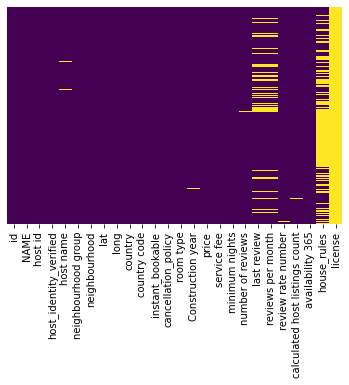

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AS YOU CAN SEE IN THE ABOVE RESULT OF NULL VALUES IN DF USING A HEATMAP . THE LICENCE COLUMN AND HOUSE_RULES COLUMN HAS TOO MANY NULL VALUES WHICH IS NOT POSSIBLE TO DETERMINE WITHOUT FURTHER INFORMATION. 

## DROPPING THOSE COLUMNS

In [32]:
df.drop(df[['house_rules','license']],axis=1,inplace=True)

In [33]:
df.head(3)

id                                 NAME      host id  \
0  1001254   Clean & quiet apt home by the park  80014485718   
1  1002102                Skylit Midtown Castle  52335172823   
2  1002403  THE VILLAGE OF HARLEM....NEW YORK !  78829239556   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   
2             3.0                0.0         NaN                NaN   

   review rate number  calculated host listings count  availability 365  
0                 4.0                             6.0             286.0  
1                 4.0                             2.0             228.0  
2                 5.0                             1.0             352.0

In [34]:
df['host name'].isnull().sum()

406

In [36]:
df['host name'].fillna('Not disclosed',inplace=True)

In [37]:
df['host name'].isnull().sum()

0

In [38]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [39]:
df.head(1)

id                                NAME      host id  \
0  1001254  Clean & quiet apt home by the park  80014485718   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   

  cancellation_policy     room type  Construction year  price service fee  \
0              strict  Private room             2020.0  $966        $193    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   

   review rate number  calculated host listings count  availability 365  
0                 4.0                             6.0             286.0

In [41]:
df.drop(df[['id', 'NAME', 'host id', 'host name','neighbourhood group', 'neighbourhood', 'country',
       'country code','Construction year','room type']],axis=1,inplace=True)

<AxesSubplot:>

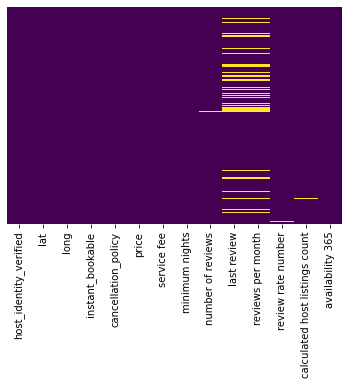

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
df.head(3)

host_identity_verified       lat      long instant_bookable  \
0            unconfirmed  40.64749 -73.97237            False   
1               verified  40.75362 -73.98377            False   
2                    NaN  40.80902 -73.94190             True   

  cancellation_policy  price service fee  minimum nights  number of reviews  \
0              strict  $966        $193             10.0                9.0   
1            moderate  $142         $28             30.0               45.0   
2            flexible  $620        $124              3.0                0.0   

  last review  reviews per month  review rate number  \
0  10/19/2021               0.21                 4.0   
1   5/21/2022               0.38                 4.0   
2         NaN                NaN                 5.0   

   calculated host listings count  availability 365  
0                             6.0             286.0  
1                             2.0             228.0  
2                             1.0             352.0

In [50]:
df[df['number of reviews'].isna()]

host_identity_verified       lat      long instant_bookable  \
97                   verified  40.79764 -73.96177             True   
141                  verified  40.73409 -73.95348            False   
566               unconfirmed  40.72956 -73.97903            False   
1066                 verified  40.74906 -73.89377             True   
1591                 verified  40.79241 -73.97111            False   
...                       ...       ...       ...              ...   
91027             unconfirmed  40.74089 -74.00002            False   
91831             unconfirmed  40.76830 -73.95919            False   
99736             unconfirmed  40.71365 -73.96232             True   
100590            unconfirmed  40.71833 -73.98556             True   
101292               verified  40.74089 -74.00002            False   

       cancellation_policy  price service fee  minimum nights  \
97                  strict  $343         $69              NaN   
141               moderate  $488         $98              NaN   
566                 strict  $844        $169              1.0   
1066              flexible  $399         $80              7.0   
1591                strict  $564        $113              3.0   
...                    ...    ...         ...             ...   
91027               strict  $695        $139              2.0   
91831             moderate  $151         $30              4.0   
99736             flexible  $546        $109              3.0   
100590              strict  $671        $134              4.0   
101292              strict  $695        $139              2.0   

        number of reviews last review  reviews per month  review rate number  \
97                    NaN    7/7/2019               0.71                 NaN   
141                   NaN         NaN               0.03                 4.0   
566                   NaN    7/1/2019               0.65                 3.0   
1066                  NaN   9/30/2018               0.64                 5.0   
1591                  NaN   9/18/2018               0.43                 5.0   
...                   ...         ...                ...                 ...   
91027                 NaN    1/1/2019               0.13                 1.0   
91831                 NaN   6/25/2019               1.33                 1.0   
99736                 NaN  10/10/2018               0.38                 1.0   
100590                NaN   6/25/2019               0.63                 4.0   
101292                NaN    1/1/2019               0.13                 1.0   

        calculated host listings count  availability 365  
97                                 1.0              55.0  
141                                1.0             325.0  
566                                1.0              85.0  
1066                               3.0             126.0  
1591                               1.0             194.0  
...                                ...               ...  
91027                              1.0               0.0  
91831                              1.0               4.0  
99736                              1.0             188.0  
100590                             2.0             244.0  
101292                             1.0               0.0  

[183 rows x 14 columns]

In [51]:
df['number of reviews'].fillna(df['number of reviews'].mean(),inplace=True)

In [56]:
df.drop(['last review'],axis=1, inplace=True)

In [57]:
df.head(3)

host_identity_verified       lat      long instant_bookable  \
0            unconfirmed  40.64749 -73.97237            False   
1               verified  40.75362 -73.98377            False   
2                    NaN  40.80902 -73.94190             True   

  cancellation_policy  price service fee  minimum nights  number of reviews  \
0              strict  $966        $193             10.0                9.0   
1            moderate  $142         $28             30.0               45.0   
2            flexible  $620        $124              3.0                0.0   

   reviews per month  review rate number  calculated host listings count  \
0               0.21                 4.0                             6.0   
1               0.38                 4.0                             2.0   
2                NaN                 5.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0

In [59]:
df[df['reviews per month'].isna()]

host_identity_verified       lat      long instant_bookable  \
2                         NaN  40.80902 -73.94190             True   
20                   verified  40.79685 -73.94872              NaN   
27                   verified  40.86754 -73.92639              NaN   
37                   verified  40.68876 -73.94312            False   
39                   verified  40.63702 -73.96327             True   
...                       ...       ...       ...              ...   
102590            unconfirmed  40.66673 -73.96127             True   
102592            unconfirmed  40.71845 -74.01183            False   
102594               verified  40.70862 -73.94651            False   
102596            unconfirmed  40.67505 -73.98045             True   
102598            unconfirmed  40.76807 -73.98342            False   

       cancellation_policy    price service fee  minimum nights  \
2                 flexible    $620        $124              3.0   
20                moderate    $281         $56              7.0   
27                  strict    $274         $55              4.0   
37                moderate    $203         $41             60.0   
39                  strict  $1,020        $204              1.0   
...                    ...      ...         ...             ...   
102590            moderate    $250         $50              1.0   
102592            moderate    $787        $157              1.0   
102594            flexible    $844        $169              1.0   
102596            moderate    $988        $198              3.0   
102598            flexible  $1,032        $206              1.0   

        number of reviews  reviews per month  review rate number  \
2                     0.0                NaN                 5.0   
20                    0.0                NaN                 3.0   
27                    0.0                NaN                 NaN   
37                    0.0                NaN                 NaN   
39                    0.0                NaN                 3.0   
...                   ...                ...                 ...   
102590                0.0                NaN                 1.0   
102592                0.0                NaN                 2.0   
102594                0.0                NaN                 3.0   
102596                0.0                NaN                 5.0   
102598                0.0                NaN                 3.0   

        calculated host listings count  availability 365  
2                                  1.0             352.0  
20                                 2.0             347.0  
27                                 1.0              96.0  
37                                 1.0             294.0  
39                                 1.0             356.0  
...                                ...               ...  
102590                             1.0             276.0  
102592                             1.0             177.0  
102594                             1.0             227.0  
102596                             1.0             342.0  
102598                             1.0              69.0  

[15879 rows x 13 columns]

In [60]:
df['reviews per month'].fillna('0.22',inplace=True)

Empty DataFrame
Columns: [host_identity_verified, lat, long, instant_bookable, cancellation_policy, price, service fee, minimum nights, number of reviews, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []

In [62]:
df[df['review rate number'].isnull()]

host_identity_verified       lat      long instant_bookable  \
27                   verified  40.86754 -73.92639              NaN   
28                unconfirmed  40.76715 -73.98533              NaN   
29                   verified  40.86482 -73.92106              NaN   
30                unconfirmed  40.72920 -73.98542              NaN   
31                unconfirmed  40.82245 -73.95104              NaN   
...                       ...       ...       ...              ...   
102125               verified  40.73858 -73.79305             True   
102126            unconfirmed  40.73492 -73.98454            False   
102127            unconfirmed  40.61334 -73.98714             True   
102128               verified  40.75727 -73.99071            False   
102129            unconfirmed  40.71035 -74.01427            False   

       cancellation_policy    price service fee  minimum nights  \
27                  strict    $274         $55              4.0   
28                moderate    $209         $42             10.0   
29                  strict    $432         $86              3.0   
30                flexible    $666        $133             14.0   
31                flexible    $770        $154              3.0   
...                    ...      ...         ...             ...   
102125            flexible    $871        $174              1.0   
102126            moderate    $414         $83             30.0   
102127            flexible    $462         $92             30.0   
102128              strict  $1,061        $212              1.0   
102129              strict    $161         $32             30.0   

        number of reviews reviews per month  review rate number  \
27                    0.0              0.22                 NaN   
28                   58.0              0.49                 NaN   
29                  108.0              1.11                 NaN   
30                   29.0              0.24                 NaN   
31                  242.0              2.04                 NaN   
...                   ...               ...                 ...   
102125              189.0              3.27                 NaN   
102126                5.0              0.11                 NaN   
102127               14.0               0.3                 NaN   
102128              174.0              6.33                 NaN   
102129                2.0               0.1                 NaN   

        calculated host listings count  availability 365  
27                                 1.0              96.0  
28                                 1.0             103.0  
29                                 3.0             172.0  
30                                 1.0              56.0  
31                                 3.0             105.0  
...                                ...               ...  
102125                             6.0             247.0  
102126                            14.0             331.0  
102127                             2.0             208.0  
102128                             5.0             282.0  
102129                            34.0             333.0  

[326 rows x 13 columns]

In [63]:
df['review rate number'].fillna(df['review rate number'].mean(),inplace=True)

In [66]:
df['calculated host listings count'].fillna(df['calculated host listings count'].median(),inplace=True)

<AxesSubplot:>

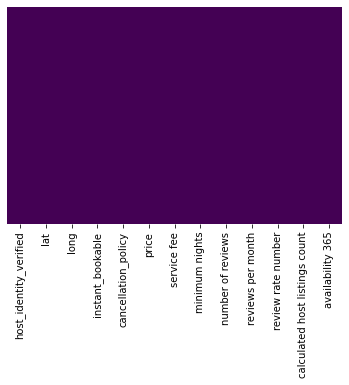

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NOW ALL THE MISSING DATA HAS BEEN CLEARED AND FILLED WITH AVAILABLE INFORMAIONS

In [70]:
df.head(20)

host_identity_verified       lat      long instant_bookable  \
0             unconfirmed  40.64749 -73.97237            False   
1                verified  40.75362 -73.98377            False   
2                     NaN  40.80902 -73.94190             True   
3             unconfirmed  40.68514 -73.95976             True   
4                verified  40.79851 -73.94399            False   
5                verified  40.74767 -73.97500             True   
6                     NaN  40.68688 -73.95596            False   
7             unconfirmed  40.68688 -73.95596            False   
8                verified  40.76489 -73.98493             True   
9             unconfirmed  40.80178 -73.96723            False   
10               verified  40.71344 -73.99037            False   
11               verified  40.80316 -73.96545             True   
12               verified  40.76076 -73.98867            False   
13               verified  40.66829 -73.98779             True   
14               verified  40.79826 -73.96113            False   
15               verified  40.73530 -74.00525             True   
16            unconfirmed  40.70837 -73.95352              NaN   
17               verified  40.69169 -73.97185              NaN   
18               verified  40.74192 -73.99501              NaN   
19                    NaN  40.67592 -73.94694              NaN   

   cancellation_policy    price service fee  minimum nights  \
0               strict    $966        $193             10.0   
1             moderate    $142         $28             30.0   
2             flexible    $620        $124              3.0   
3             moderate    $368         $74             30.0   
4             moderate    $204         $41             10.0   
5             flexible    $577        $115              3.0   
6             moderate     $71         $14             45.0   
7             moderate  $1,060        $212             45.0   
8               strict  $1,018        $204              2.0   
9               strict    $291         $58              2.0   
10            flexible    $319         $64              1.0   
11            flexible    $606        $121              5.0   
12              strict    $714        $143              2.0   
13            moderate    $580        $116              4.0   
14            flexible    $149         $30              2.0   
15            flexible    $578          NaN            90.0   
16            moderate    $778          NaN             2.0   
17            flexible    $656          NaN             2.0   
18            moderate    $460          NaN             1.0   
19            moderate  $1,095          NaN             3.0   

    number of reviews reviews per month  review rate number  \
0                 9.0              0.21                 4.0   
1                45.0              0.38                 4.0   
2                 0.0              0.22                 5.0   
3               270.0              4.64                 4.0   
4                 9.0               0.1                 3.0   
5                74.0              0.59                 3.0   
6                49.0               0.4                 5.0   
7                49.0               0.4                 5.0   
8               430.0              3.47                 3.0   
9               118.0              0.99                 5.0   
10              160.0              1.33                 3.0   
11               53.0              0.43                 4.0   
12              188.0               1.5                 4.0   
13              167.0              1.34                 4.0   
14              113.0              0.91                 3.0   
15               27.0              0.22                 3.0   
16              148.0               1.2                 3.0   
17              198.0              1.72                 5.0   
18              260.0              2.12                 3.0   
19               53.0           

In [91]:
df['instant_bookable'].value_counts()

False    51474
True     51020
Name: instant_bookable, dtype: int64

In [100]:
df['instant_bookable'].fillna('False',inplace=True)

In [101]:
df.head(20)

host_identity_verified       lat      long instant_bookable  \
0             unconfirmed  40.64749 -73.97237            False   
1                verified  40.75362 -73.98377            False   
2                     NaN  40.80902 -73.94190             True   
3             unconfirmed  40.68514 -73.95976             True   
4                verified  40.79851 -73.94399            False   
5                verified  40.74767 -73.97500             True   
6                     NaN  40.68688 -73.95596            False   
7             unconfirmed  40.68688 -73.95596            False   
8                verified  40.76489 -73.98493             True   
9             unconfirmed  40.80178 -73.96723            False   
10               verified  40.71344 -73.99037            False   
11               verified  40.80316 -73.96545             True   
12               verified  40.76076 -73.98867            False   
13               verified  40.66829 -73.98779             True   
14               verified  40.79826 -73.96113            False   
15               verified  40.73530 -74.00525             True   
16            unconfirmed  40.70837 -73.95352            False   
17               verified  40.69169 -73.97185            False   
18               verified  40.74192 -73.99501            False   
19                    NaN  40.67592 -73.94694            False   

   cancellation_policy    price service fee  minimum nights  \
0               strict    $966        $193             10.0   
1             moderate    $142         $28             30.0   
2             flexible    $620        $124              3.0   
3             moderate    $368         $74             30.0   
4             moderate    $204         $41             10.0   
5             flexible    $577        $115              3.0   
6             moderate     $71         $14             45.0   
7             moderate  $1,060        $212             45.0   
8               strict  $1,018        $204              2.0   
9               strict    $291         $58              2.0   
10            flexible    $319         $64              1.0   
11            flexible    $606        $121              5.0   
12              strict    $714        $143              2.0   
13            moderate    $580        $116              4.0   
14            flexible    $149         $30              2.0   
15            flexible    $578          NaN            90.0   
16            moderate    $778          NaN             2.0   
17            flexible    $656          NaN             2.0   
18            moderate    $460          NaN             1.0   
19            moderate  $1,095          NaN             3.0   

    number of reviews reviews per month  review rate number  \
0                 9.0              0.21                 4.0   
1                45.0              0.38                 4.0   
2                 0.0              0.22                 5.0   
3               270.0              4.64                 4.0   
4                 9.0               0.1                 3.0   
5                74.0              0.59                 3.0   
6                49.0               0.4                 5.0   
7                49.0               0.4                 5.0   
8               430.0              3.47                 3.0   
9               118.0              0.99                 5.0   
10              160.0              1.33                 3.0   
11               53.0              0.43                 4.0   
12              188.0               1.5                 4.0   
13              167.0              1.34                 4.0   
14              113.0              0.91                 3.0   
15               27.0              0.22                 3.0   
16              148.0               1.2                 3.0   
17              198.0              1.72                 5.0   
18              260.0              2.12                 3.0   
19               53.0           

In [125]:
df.drop(['cancellation_policy'],axis=1, inplace=True)

In [126]:
df.head(20)

lat      long    price service fee  minimum nights  \
0   40.64749 -73.97237    $966        $193             10.0   
1   40.75362 -73.98377    $142         $28             30.0   
2   40.80902 -73.94190    $620        $124              3.0   
3   40.68514 -73.95976    $368         $74             30.0   
4   40.79851 -73.94399    $204         $41             10.0   
5   40.74767 -73.97500    $577        $115              3.0   
6   40.68688 -73.95596     $71         $14             45.0   
7   40.68688 -73.95596  $1,060        $212             45.0   
8   40.76489 -73.98493  $1,018        $204              2.0   
9   40.80178 -73.96723    $291         $58              2.0   
10  40.71344 -73.99037    $319         $64              1.0   
11  40.80316 -73.96545    $606        $121              5.0   
12  40.76076 -73.98867    $714        $143              2.0   
13  40.66829 -73.98779    $580        $116              4.0   
14  40.79826 -73.96113    $149         $30              2.0   
15  40.73530 -74.00525    $578          NaN            90.0   
16  40.70837 -73.95352    $778          NaN             2.0   
17  40.69169 -73.97185    $656          NaN             2.0   
18  40.74192 -73.99501    $460          NaN             1.0   
19  40.67592 -73.94694  $1,095          NaN             3.0   

    number of reviews reviews per month  review rate number  \
0                 9.0              0.21                 4.0   
1                45.0              0.38                 4.0   
2                 0.0              0.22                 5.0   
3               270.0              4.64                 4.0   
4                 9.0               0.1                 3.0   
5                74.0              0.59                 3.0   
6                49.0               0.4                 5.0   
7                49.0               0.4                 5.0   
8               430.0              3.47                 3.0   
9               118.0              0.99                 5.0   
10              160.0              1.33                 3.0   
11               53.0              0.43                 4.0   
12              188.0               1.5                 4.0   
13              167.0              1.34                 4.0   
14              113.0              0.91                 3.0   
15               27.0              0.22                 3.0   
16              148.0               1.2                 3.0   
17              198.0              1.72                 5.0   
18              260.0              2.12                 3.0   
19               53.0              4.44                 5.0   

    calculated host listings count  availability 365  
0                              6.0             286.0  
1                              2.0             228.0  
2                              1.0             352.0  
3                              1.0             322.0  
4                              1.0             289.0  
5                              1.0             374.0  
6                              1.0             224.0  
7                              1.0             219.0  
8                              1.0             180.0  
9                              1.0             375.0  
10                             4.0               1.0  
11                             1.0             163.0  
12                             1.0             258.0  
13                             3.0              47.0  
14                             1.0              68.0  
15                             1.0             100.0  
16                             1.0             197.0  
17                             1.0              96.0  
18                             1.0             325.0  
19                             1.0             345.0

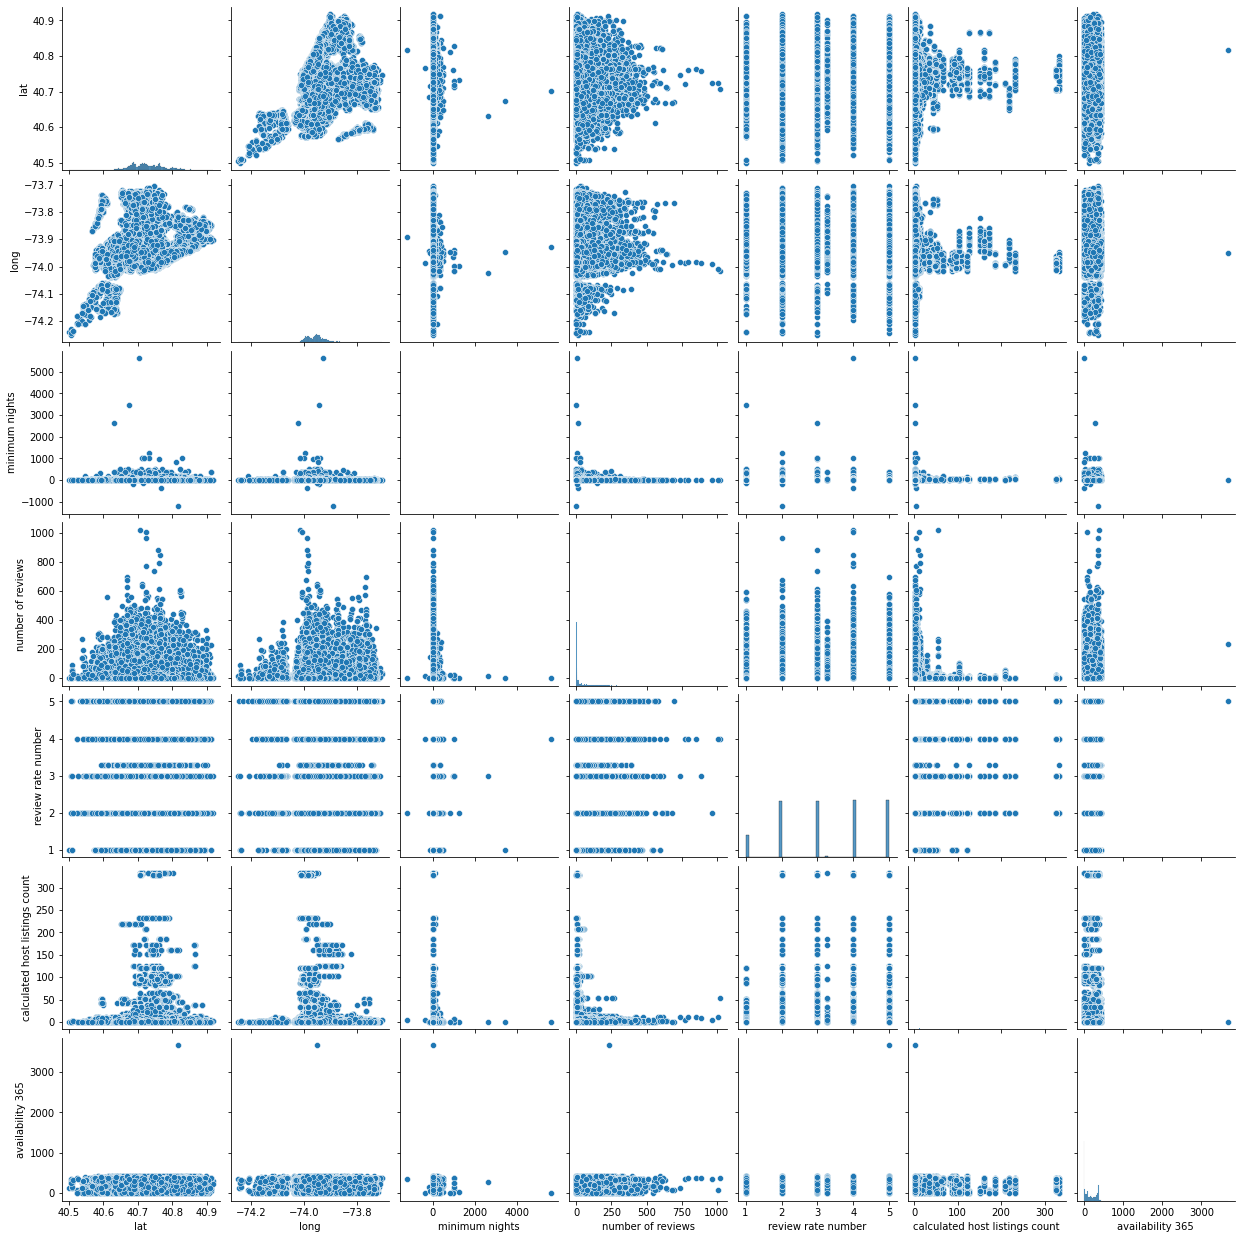

In [127]:
sns.pairplot(df)